In [116]:
from rdkit import Chem
from rdkit.Chem import AllChem
from rdkit.Chem import Draw
from rdkit.Chem.Draw import IPythonConsole
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
%matplotlib inline

In [97]:
primes = [2,3,5,7,11,13,17,19,23,29,31,37,41,43,47,53,59,61,67,71,73,79,83,89,97,
          101,103,107,109,113,127,131,137,139,149,151,157,163,167,173,179,181,191,193,197,199,
          211,223,227,229,233,239,241,251,257,263,269,271,277,281,283,293,
          307,311,313,317,331,337,347,349,353,359,367,373,379,383,389,397,
          401,409,419,421,431,433,439,443,449,457,461,463,467,479,487,491,499,
          503,509,521,523,541,547,557,563,569,571,577,587,593,599,
          601,607,613,617,619,631,641,643,647,653,659,661,673,677,683,691,
          701,709,719,727,733,739,743,751,757,761,769,773,787,797,
          809,811,821,823,827,829,839,853,857,859,863,877,881,883,887,
          907,911,919,929,937,941,947,953,967,971,977,983,991,997]
len(primes)
elements = ['C', 'O', 'N', 'Cl', 'Br', 'F', 'S', 'I', 'P']

In [79]:
data = pd.read_csv(r'IGC50.csv')
data.head()

,smiles,Activity,split
0,OC(=O)C1=C(Cl)C=CC=C1Cl,2.33,1
1,OC(=O)C1=C(Cl)C=C(Cl)C=C1Cl,2.59,1
2,OC(=O)C1=CC=CC(=C1Cl)Cl,2.59,1
3,OC(=O)C1=CC(=CC=C1Cl)Cl,2.54,1
4,OC1=C(C=C(C=C1)[N+]([O-])=O)[N+]([O-])=O,4.06,1


In [80]:
data['formula'] = None

In [81]:
for i,s in enumerate(data['smiles']):
    m = Chem.MolFromSmiles(s)
    data.loc[i,'formula'] = Chem.rdMolDescriptors.CalcMolFormula(m)
data.head()

,smiles,Activity,split,formula
0,OC(=O)C1=C(Cl)C=CC=C1Cl,2.33,1,C7H4Cl2O2
1,OC(=O)C1=C(Cl)C=C(Cl)C=C1Cl,2.59,1,C7H3Cl3O2
2,OC(=O)C1=CC=CC(=C1Cl)Cl,2.59,1,C7H4Cl2O2
3,OC(=O)C1=CC(=CC=C1Cl)Cl,2.54,1,C7H4Cl2O2
4,OC1=C(C=C(C=C1)[N+]([O-])=O)[N+]([O-])=O,4.06,1,C6H4N2O5


In [89]:
for e in elements:
    data[e] = 0
    for i,s in enumerate(data['formula']):
        p1 = s.find(e)
        if p1 != -1:
            data.loc[i,e] = 1
            p = p1 + len(e)
            n = re.search(r'\d*',s[p:p+2]).group()
            if n !=  '': 
                n = int(''.join(n))
                data.loc[i,e] = n
        else:
            data.loc[i,e] = 0
data.head()

,smiles,Activity,split,formula,C,O,N,S,P,F,Cl,Br,I
0,OC(=O)C1=C(Cl)C=CC=C1Cl,2.33,1,C7H4Cl2O2,7,2,0,0,0,0,2,0,0
1,OC(=O)C1=C(Cl)C=C(Cl)C=C1Cl,2.59,1,C7H3Cl3O2,7,2,0,0,0,0,3,0,0
2,OC(=O)C1=CC=CC(=C1Cl)Cl,2.59,1,C7H4Cl2O2,7,2,0,0,0,0,2,0,0
3,OC(=O)C1=CC(=CC=C1Cl)Cl,2.54,1,C7H4Cl2O2,7,2,0,0,0,0,2,0,0
4,OC1=C(C=C(C=C1)[N+]([O-])=O)[N+]([O-])=O,4.06,1,C6H4N2O5,6,5,2,0,0,0,0,0,0


In [147]:
data.to_csv('IGC50_e_count.csv')

In [100]:
ele_sum = []
ele_max = []
for e in elements:
    ele_sum.append(data[e].sum())
    ele_max.append(data[e].max())
ele_df = pd.DataFrame({'element':elements,'sum':ele_sum,'max':ele_max})
ele_df.sort_values('sum',ascending=False,inplace=True)
elements = list(ele_df['element'])
ele_df

,element,sum,max
0,C,13139,19
1,O,2589,7
2,N,877,5
3,Cl,406,6
4,Br,225,5
5,F,127,5
6,S,118,2
7,I,25,3
8,P,4,1


NC(=N)NC(=N)NC1=CC=CC=C1


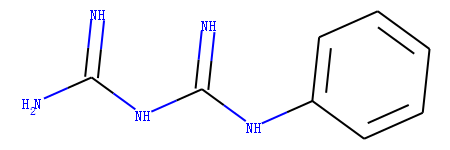

In [146]:
e = 'N'
n = 5
l = data.loc[data[e]==n,'smiles'].to_list()
m = Chem.MolFromSmiles(l[0])
print(l[0])
m

In [167]:
symbol_vec = []
for i,m in enumerate(ele_df['max']):
    symbol_vec.extend(['_'.join([ele_df.loc[i,'element'],str(j)]) for j in range(m)])
print(len(symbol_vec),ele_df['max'].sum())
print(symbol_vec)
print(primes[0:ele_df['max'].sum()])
symbol_dict = {}
for i,s in enumerate(symbol_vec):
    symbol_dict[s]=primes[i]
print(symbol_dict)    

53 53
['C_0', 'C_1', 'C_2', 'C_3', 'C_4', 'C_5', 'C_6', 'C_7', 'C_8', 'C_9', 'C_10', 'C_11', 'C_12', 'C_13', 'C_14', 'C_15', 'C_16', 'C_17', 'C_18', 'O_0', 'O_1', 'O_2', 'O_3', 'O_4', 'O_5', 'O_6', 'N_0', 'N_1', 'N_2', 'N_3', 'N_4', 'Cl_0', 'Cl_1', 'Cl_2', 'Cl_3', 'Cl_4', 'Cl_5', 'Br_0', 'Br_1', 'Br_2', 'Br_3', 'Br_4', 'F_0', 'F_1', 'F_2', 'F_3', 'F_4', 'S_0', 'S_1', 'I_0', 'I_1', 'I_2', 'P_0']
[2, 3, 5, 7, 11, 13, 17, 19, 23, 29, 31, 37, 41, 43, 47, 53, 59, 61, 67, 71, 73, 79, 83, 89, 97, 101, 103, 107, 109, 113, 127, 131, 137, 139, 149, 151, 157, 163, 167, 173, 179, 181, 191, 193, 197, 199, 211, 223, 227, 229, 233, 239, 241]
{'C_0': 2, 'C_1': 3, 'C_2': 5, 'C_3': 7, 'C_4': 11, 'C_5': 13, 'C_6': 17, 'C_7': 19, 'C_8': 23, 'C_9': 29, 'C_10': 31, 'C_11': 37, 'C_12': 41, 'C_13': 43, 'C_14': 47, 'C_15': 53, 'C_16': 59, 'C_17': 61, 'C_18': 67, 'O_0': 71, 'O_1': 73, 'O_2': 79, 'O_3': 83, 'O_4': 89, 'O_5': 97, 'O_6': 101, 'N_0': 103, 'N_1': 107, 'N_2': 109, 'N_3': 113, 'N_4': 127, 'Cl_0': 131,

In [159]:
dict_iter_p = {}
for e in elements:
    dict_iter_p[e] = []
dict_iter_p

{'C': [],
 'O': [],
 'N': [],
 'Cl': [],
 'Br': [],
 'F': [],
 'S': [],
 'I': [],
 'P': []}

In [190]:
import itertools

In [169]:
data_index = 0
s = data.loc[data_index,'smiles']
m = Chem.MolFromSmiles(s)

In [188]:
mol_symbol_index = {}

for e in elements:
    mol_symbol_index[e]=[]
    
for i,a in  enumerate(m.GetAtoms()):
    symbol = a.GetSymbol()
    mol_symbol_index[symbol].extend([i])

for key in list(mol_symbol_index.keys()):
    if not mol_symbol_index.get(key):
        del mol_symbol_index[key]

mol_symbol_index

{'C': [1, 3, 4, 6, 7, 8, 9], 'O': [0, 2], 'Cl': [5, 10]}

In [189]:
dict_iter_p = {}

for key in list(mol_symbol_index.keys()):
    iter_p = []
    index_list = mol_symbol_index.get(key)
    for i in itertools.permutations(index_list, len(index_list)):
            iter_p.append(i)
    dict_iter_p[key] = iter_p

{'C': [(1, 3, 4, 6, 7, 8, 9),
  (1, 3, 4, 6, 7, 9, 8),
  (1, 3, 4, 6, 8, 7, 9),
  (1, 3, 4, 6, 8, 9, 7),
  (1, 3, 4, 6, 9, 7, 8),
  (1, 3, 4, 6, 9, 8, 7),
  (1, 3, 4, 7, 6, 8, 9),
  (1, 3, 4, 7, 6, 9, 8),
  (1, 3, 4, 7, 8, 6, 9),
  (1, 3, 4, 7, 8, 9, 6),
  (1, 3, 4, 7, 9, 6, 8),
  (1, 3, 4, 7, 9, 8, 6),
  (1, 3, 4, 8, 6, 7, 9),
  (1, 3, 4, 8, 6, 9, 7),
  (1, 3, 4, 8, 7, 6, 9),
  (1, 3, 4, 8, 7, 9, 6),
  (1, 3, 4, 8, 9, 6, 7),
  (1, 3, 4, 8, 9, 7, 6),
  (1, 3, 4, 9, 6, 7, 8),
  (1, 3, 4, 9, 6, 8, 7),
  (1, 3, 4, 9, 7, 6, 8),
  (1, 3, 4, 9, 7, 8, 6),
  (1, 3, 4, 9, 8, 6, 7),
  (1, 3, 4, 9, 8, 7, 6),
  (1, 3, 6, 4, 7, 8, 9),
  (1, 3, 6, 4, 7, 9, 8),
  (1, 3, 6, 4, 8, 7, 9),
  (1, 3, 6, 4, 8, 9, 7),
  (1, 3, 6, 4, 9, 7, 8),
  (1, 3, 6, 4, 9, 8, 7),
  (1, 3, 6, 7, 4, 8, 9),
  (1, 3, 6, 7, 4, 9, 8),
  (1, 3, 6, 7, 8, 4, 9),
  (1, 3, 6, 7, 8, 9, 4),
  (1, 3, 6, 7, 9, 4, 8),
  (1, 3, 6, 7, 9, 8, 4),
  (1, 3, 6, 8, 4, 7, 9),
  (1, 3, 6, 8, 4, 9, 7),
  (1, 3, 6, 8, 7, 4, 9),
  (1, 3, 6, 8, 7, 9,

In [233]:
#产生所有的遍历顺序
s = 0
l = 1
for key in list(dict_iter_p.keys()):
    s += data.loc[data_index,key]
    l = l * len(dict_iter_p.get(key))

mol_array = np.zeros((l,s),dtype=np.int8)

n = 0
for key in list(dict_iter_p.keys()):
    l2 = len(dict_iter_p.get(key))
    l3 = data.loc[data_index,key]
    for i in range(0,l,l2):
        mol_array[i:i+l2,n:n+l3] = dict_iter_p.get(key)
    n += data.loc[data_index,key]

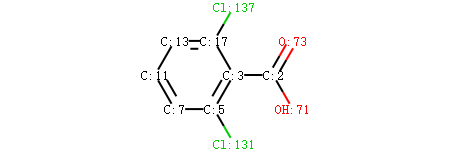

In [286]:
sorted_index = mol_array[0]
for n,i in enumerate(sorted_index):
    a = m.GetAtomWithIdx(int(i))
    a.SetAtomMapNum(prime_map[n])
m

In [238]:
prime_map = []
for key in list(mol_symbol_index.keys()):
    for i in range(data.loc[data_index,key]):
        prime_map.append(symbol_dict.get(key+'_'+str(i)))
prime_map

[2, 3, 5, 7, 11, 13, 17, 71, 73, 131, 137]

In [253]:
sorted_sum = np.zeros(l,dtype=np.int64)

j = 0
for sorted_index in mol_array:
    for n,i in enumerate(sorted_index):
        a = m.GetAtomWithIdx(int(i))
        a.SetAtomMapNum(prime_map[n])
    for a in m.GetAtoms():
        p = 1
        p = p*int(a.GetAtomMapNum())
        for an in a.GetNeighbors():
            p = p*int(an.GetAtomMapNum())
            sorted_sum[j] += p
    j += 1

In [269]:
min_list = np.where(sorted_sum==np.min(sorted_sum))
min_list

(array([  796,  5836, 10876, 15916], dtype=int64),)

In [285]:
print(prime_map)
for i in min_list:
    for j in i:
        print(mol_array[j])

[2, 3, 5, 7, 11, 13, 17, 71, 73, 131, 137]
[ 3  1  8  4  9  6  7  0  2  5 10]
[ 3  1  8  4  9  6  7  0  2  5 10]
[ 3  1  8  4  9  6  7  0  2  5 10]
[ 3  1  8  4  9  6  7  0  2  5 10]


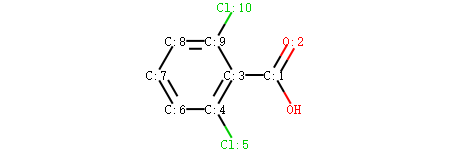

In [303]:
for i,a in enumerate(m.GetAtoms()):
    a.SetAtomMapNum(i)
m

In [312]:
primeCRIvec = symbol_dict
for key in list(primeCRIvec.keys()):
    primeCRIvec[key] = 0

cnt = 0
s = 'C'
for n,i in enumerate(mol_array[j]):
    a = m.GetAtomWithIdx(int(i))
    a.SetAtomMapNum(prime_map[n])
    p = 1
    p = p*int(a.GetAtomMapNum())
    for an in a.GetNeighbors():
        p = p*int(an.GetAtomMapNum())
    #print(p,s,i,s == a.GetSymbol(),s+'_'+str(cnt))
    if s == a.GetSymbol():
        primeCRIvec[s+'_'+str(cnt)] = p
        cnt = cnt + 1
    else:
        s = a.GetSymbol()
        cnt = 0
        primeCRIvec[s+'_'+str(0)] = p
        cnt = cnt + 1

print(primeCRIvec)

{'C_0': 462, 'C_1': 31098, 'C_2': 935, 'C_3': 23842, 'C_4': 15070, 'C_5': 1547, 'C_6': 1105, 'C_7': 0, 'C_8': 0, 'C_9': 0, 'C_10': 0, 'C_11': 0, 'C_12': 0, 'C_13': 0, 'C_14': 0, 'C_15': 0, 'C_16': 0, 'C_17': 0, 'C_18': 0, 'O_0': 213, 'O_1': 219, 'O_2': 0, 'O_3': 0, 'O_4': 0, 'O_5': 0, 'O_6': 0, 'N_0': 0, 'N_1': 0, 'N_2': 0, 'N_3': 0, 'N_4': 0, 'Cl_0': 917, 'Cl_1': 1507, 'Cl_2': 0, 'Cl_3': 0, 'Cl_4': 0, 'Cl_5': 0, 'Br_0': 0, 'Br_1': 0, 'Br_2': 0, 'Br_3': 0, 'Br_4': 0, 'F_0': 0, 'F_1': 0, 'F_2': 0, 'F_3': 0, 'F_4': 0, 'S_0': 0, 'S_1': 0, 'I_0': 0, 'I_1': 0, 'I_2': 0, 'P_0': 0}


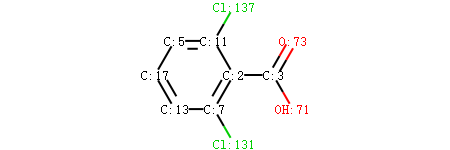

In [294]:
sorted_index = mol_array[796]
for n,i in enumerate(sorted_index):
    a = m.GetAtomWithIdx(int(i))
    a.SetAtomMapNum(prime_map[n])
m

In [317]:
for key in list(primeCRIvec.keys()):
    print(str(primeCRIvec[key])+',')

462,
31098,
935,
23842,
15070,
1547,
1105,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
213,
219,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
917,
1507,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
